# Asset Selection

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import random

jtplot.style(figsize=(15, 9))

In [2]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META', 'AVGO', 'TER']
amounts  = [20, 10, 30, 10, 2, 5]
weights = [i / sum(amounts) for i in amounts]
returns = [f'{t}_returns' for t in tickers]

In [3]:
df = yf.download(tickers, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df.head()

[*********************100%***********************]  6 of 6 completed


Close                                                \
                  AMD       AMZN        AVGO        BAC        META   
Date                                                                  
2023-01-03  64.019997  85.820000  537.162842  32.075714  124.484192   
2023-01-04  64.660004  85.139999  543.723450  32.678745  127.108803   
2023-01-05  62.330002  83.120003  538.657410  32.611744  126.679680   
2023-01-06  63.959999  86.080002  571.082397  32.937195  129.753372   
2023-01-09  67.239998  87.360001  559.882690  32.439449  129.204498   

                            High                                    ...  \
                  TER        AMD       AMZN        AVGO        BAC  ...   
Date                                                                ...   
2023-01-03  85.381950  66.879997  86.959999  550.837481  32.630891  ...   
2023-01-04  86.862442  65.790001  86.980003  551.409942  33.329640  ...   
2023-01-05  86.564362  64.349998  85.419998  543.335318  32.678748  ...   
2023-01-06  90.658081  64.300003  86.400002  573.576638  33.099920  ...   
2023-01-09  92.615524  69.320000  89.480003  583.932119  33.272211  ...   

                  Open                                      Volume            \
                  AVGO        BAC        META        TER       AMD      AMZN   
Date                                                                           
2023-01-03  548.343240  31.807700  122.568131  88.283325  46851800  76706000   
2023-01-04  546.392376  32.449020  127.118777  86.683590  47477100  68885100   
2023-01-05  539.327070  32.468163  125.871336  86.286141  46159500  67930800   
2023-01-06  546.518568  32.630892  128.705522  87.716960  70161300  83303400   
2023-01-09  574.838361  33.262640  130.891035  92.347250  69741300  65266100   

                                                  
               AVGO       BAC      META      TER  
Date                                              
2023-01-03  2017300  35221500  35528500  1033200  
2023-01-04  1707400  41998500  32397100  2025400  
2023-01-05  1627700  34177000  25447100   998700  
2023-01-06  3526100  34068700  27584500  1444500  
2023-01-09  3773900  43818800  26649100  1654500  

[5 rows x 30 columns]

In [4]:
portfolio = pd.DataFrame(index=df.index, columns=tickers, data=0)

for ticker, amount in zip(tickers, amounts):
    portfolio[ticker] = df['Close'][ticker] * amount
    portfolio[f'{ticker}_returns'] = np.log(portfolio[ticker].div(portfolio[ticker].shift(1)))

portfolio.dropna(axis=0, inplace=True)
portfolio.head()

,AMD,AMZN,BAC,META,AVGO,TER,AMD_returns,AMZN_returns,BAC_returns,META_returns,AVGO_returns,TER_returns
Date,,,,,,,,,,,,
2023-01-04,1293.200073,851.399994,980.362358,1271.088028,1087.446899,434.312210,0.009947,-0.007955,0.018626,0.020865,0.012139,0.017191
2023-01-05,1246.600037,831.200027,978.352318,1266.796799,1077.314819,432.821808,-0.036700,-0.024012,-0.002052,-0.003382,-0.009361,-0.003438
2023-01-06,1279.199982,860.800018,988.115845,1297.533722,1142.164795,453.290405,0.025815,0.034992,0.009930,0.023974,0.058454,0.046207
2023-01-09,1344.799957,873.600006,973.183479,1292.044983,1119.765381,463.077621,0.050010,0.014760,-0.015227,-0.004239,-0.019806,0.021362
2023-01-10,1361.000061,898.700027,979.788208,1327.172699,1115.960938,470.877571,0.011974,0.028327,0.006764,0.026825,-0.003403,0.016703


In [5]:
rates = ['^GSPC', '^TNX']
rates_df = yf.download(rates, dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
rates_df = rates_df['Close']

rates_df['market_returns'] = np.log(rates_df['^GSPC'].div(rates_df['^GSPC'].shift(1)))
rates_df['risk_free_returns'] = np.log(rates_df['^TNX'].div(rates_df['^TNX'].shift(1)))

rates_df.dropna(inplace=True)
rates_df.head()

[*********************100%***********************]  2 of 2 completed


,^GSPC,^TNX,market_returns,risk_free_returns
Date,,,,
2023-01-04,3852.969971,3.709,0.007511,-0.022395
2023-01-05,3808.100098,3.720,-0.011714,0.002961
2023-01-06,3895.080078,3.569,0.022584,-0.041438
2023-01-09,3892.090088,3.517,-0.000768,-0.014677
2023-01-10,3919.250000,3.621,0.006954,0.029142


In [20]:
risk_free_rate = rates_df['risk_free_returns'].sum()
market_rate = rates_df['market_returns'].sum()
market_std = rates_df['market_returns'].std()
portfolio_std = portfolio[returns].sum(axis=1).std()
portfolio_returns = portfolio[returns].sum(axis=1).sum()

In [19]:
E_R_portfolio = risk_free_rate + (market_rate - risk_free_rate)*portfolio_std/market_std
E_R_portfolio

3.383569872523047

Text(0.08, 5.02, 'capital market line')

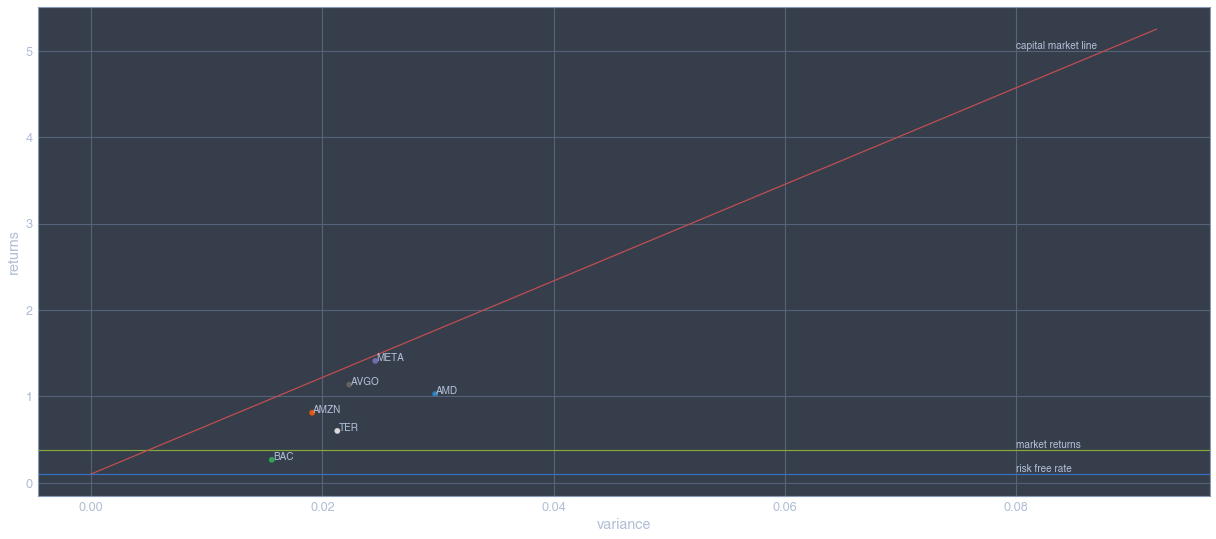

In [23]:
fig, ax = plt.subplots(1, figsize=(21, 9))

x = portfolio[returns].std().to_list()
y = portfolio[returns].sum().to_list()

ax.scatter(x, y, c=np.arange(6), cmap='tab20c')
ax.axhline(rates_df['risk_free_returns'].sum())
ax.axhline(rates_df['market_returns'].sum(), color='g')

ax.plot([0, portfolio_std], [risk_free_rate, portfolio_returns], c='r')

ax.set_xlabel('variance')
ax.set_ylabel('returns')

for i, ticker in enumerate(tickers):
    ax.annotate(ticker, (x[i], y[i]), xytext=(x[i]+0.0001, y[i]+0.0001))

ax.annotate('risk free rate', (0.08, 0.13))
ax.annotate('market returns', (0.08, 0.4))
ax.annotate('capital market line', (0.08, 5.02))